
# **Reto Bancolombia**

---

**Nombre:** Lorenzo Ramirez Calderon

**Institución:** Marymount Barranquilla

## Introducción

La globalización ha causado que día a día recibamos noticias de todas los rincones de la tierra. Influyendo estas en nuestro pensar y forma de ver el mundo. Cobrando estas un mayor impacto del que pensamos, especialmente en el ámbito financiero, tal y como establece Darmien Puy (2019) en el siguiente fragmento, “el tono que usan los medios de comunicación constituye una representación muy fidedigna de los ánimos de los inversionistas”. Por consiguiente, es importante para Bancolombia como una de las mayores entidades financieras del país poder conocer con facilidad si una noticia es de un tono positivo o negativo y tomar decisiones basadas en estas. Para de esa manera evitar situaciones como la sucedida en el Silicon Valley Bank, donde el pánico de sus clientes debido a diferentes noticias hiciera que estos retiraran sus fondos del banco, dejando a este en una situación insostenible. Todo esto debido a que los bancos al fin y al cabo son los poseedores de la confianza financiera pública, al guardar los ahorros de los Colombianos y además prestar a aquellos que lo necesiten creando así un ciclo económico. Haciendo que el punto focal de la siguiente investigación sea encontrar el modelo de clasificación de noticias más eficaz. Cuyo objetivo será clasificar una noticia como positiva o negativa, basada en el título, descripción, y texto de la noticia. Con el fin de que Bancolombia pueda aprovechar los beneficios de estos modelos de clasificación, tales como la automatización de los datos, la optimización de recursos y el reconocimiento de patrones complejos. De esa manera, permitiendo que Bancolombia tome decisiones eficientes que aporten a su propósito de promover el desarrollo económico sostenible para teniendo asi un impacto positivo en los territorios donde operan.

## Metodologia


La investigación se basará en un método de investigación mixto con el uso de variables cualitativas y cuantitativas, para de esa manera poder explorar los diferentes tipos de modelos de aprendizaje supervisado utilizando una base de datos de 1055 noticias de diferentes ámbitos, todas ya clasificadas entre positivo o negativo teniendo solo en cuenta las columnas de texto, descripción, y título puesto que el resto no influyen en el tono de estas. Siendo estos después medidos y analizados con base en su precisión, recall y exactitud para escoger el más apropiado para estas predicciones. La base de datos utilizada es previamente procesada en tres pasos claves, primeramente son divididos entre una muestra de entrenamiento y de prueba, siendo la de prueba un 30% de la totalidad de estos. Para después ser filtrados removiendo los *stopwords* y las palabras más comunes. Por último, los datos filtrados pasan por un proceso de vectorización para poder ser utilizados en el entrenamiento de los modelos y en el análisis exploratorio de los datos. Los modelos a explorar serán K Vecinos, *Random Forest*, Árbol de decisión, y *Support Vector Machine*, siendo estos además hiperparametrizados para lograr encontrar aquellos parámetros que nos brindan los mejores resultados en cada uno de los modelos. Finalmente, los resultados son discutidos y analizados para así brindar recomendaciones a Bancolombia con el fin que estos modelos puedan ser implementados por la empresa.

## Inicialización de los datos

In [ ]:
#Clona un repositorio de Github del cual va a ser extraida la base de datos
!git clone https://github.com/Lorenzo-Ramirez-C/Data_Challenge.git

Cloning into 'Data_Challenge'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 2.61 MiB | 41.19 MiB/s, done.


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
nltk.download('punkt')
from scipy.stats import shapiro

# Define la ruta del archivo
file_path = ("/content/Data_Challenge/Data_Challenge_Base_De_Datos_limpio_sentimiento.xlsx")

# Lee el archivo .xlsx
df = pd.read_excel(file_path, engine='openpyxl')
df = pd.read_excel("Data_Challenge/Data_Challenge_Base_De_Datos_limpio_sentimiento.xlsx")
df.head(4)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,search,Year,Month,Day,date,media,description,title,link,text,word_count,feeling
0,PROCTER & GAMBLE-PG-NEWS,2021,6,27,2021-06-27,MarketWatch,The stock outperformed some of its competitors...,Ecolab Inc. stock outperforms competitors on s...,https://www.marketwatch.com/story/ecolab-inc-s...,in sign up close search overlay advertisement ...,100,1
1,AMERICAN TOWER-AMT-NEWS,2021,8,25,2021-08-25,Markets Insider,Markets Stocks Indices Commodities Cryptocurre...,Substack will start accepting bitcoin as payme...,https://markets.businessinsider.com/news/curre...,to offer bitcoin payments and payouts on the o...,100,1
2,LINDE-LIN-NEWS,2021,7,8,2021-07-08,MarketWatch,"Shares of Linde PLC LIN, +1.47% slid 1.89% to ...",Linde PLC stock underperforms Thursday when co...,https://www.marketwatch.com/story/linde-plc-st...,in sign up close search overlay foreign busine...,100,-1
3,LINDE-LIN-NEWS,2021,7,2,2021-07-02,Barron's,These five European dividend stocks are among ...,European Dividends Are on the Mend After a Pan...,https://www.barrons.com/articles/european-divi...,6 2021 original july 2 2021 order reprints pri...,100,1


## Filtración, División, y Vectorización de los datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Suponiendo que tienes un DataFrame llamado 'data'
# Cargar tus datos aquí
# data = pd.read_csv('tu_archivo.csv')

# Asignar las columnas para las características y la etiqueta
features_columns = ['description', 'title', 'text']
label_column = 'feeling'

# Dividir los datos en conjunto de entrenamiento y de prueba
train_data, validation_data = train_test_split(df,test_size=0.3, random_state=42) # Ajusta el test_size según sea necesario

# Continúa con el código que ya tienes
X_train_raw = train_data[features_columns]
y_train = train_data[label_column]
X_test_raw = validation_data[features_columns]
y_test = validation_data[label_column]


In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Suponiendo que train_data es tu DataFrame de entrenamiento
# 1. Dividir el conjunto de datos según las etiquetas de sentimiento
grouped_data = train_data.groupby('feeling')

# 2. Contar las palabras más frecuentes para cada etiqueta
word_counts_per_label = {}
for label, group in grouped_data:
    all_words = ' '.join(' ' + group['description'] + ' ' + group['title'] + ' ' + group['text']).split()
    word_counts_per_label[label] = Counter(all_words)

# 3. Identificar las palabras que son comunes en todas las etiquetas
common_words = set(word_counts_per_label[list(word_counts_per_label.keys())[0]].keys())
for label in word_counts_per_label:
    common_words.intersection_update(word_counts_per_label[label].keys())

# 4. Filtrar las palabras que ya están en la lista de stopwords y las que son muy comunes
additional_stopwords = [word for word in common_words if word not in ENGLISH_STOP_WORDS and word_counts_per_label[label][word] > 100]  # ejemplo de umbral

print("Palabras sugeridas para añadir a la lista de palabras de parada:", additional_stopwords)

# 5. Añadir las palabras sugeridas a la lista existente de palabras de parada
updated_stopwords_list = list(ENGLISH_STOP_WORDS) + additional_stopwords


Palabras sugeridas para añadir a la lista de palabras de parada: ['customer', 'far', 'use', 'second', 'high', 'brand', 'publishing', 'platform', 'product', 'factors', 'general', 'appsbest', 'include', 'aerospace', 'middle', 'commodities', 'team', 'overview', 'corporate', 'withdrawal', 'loansbest', 'topics', 'videos', 'thats', 'youtube', 'later', 'careers', 'reit', 'went', 'futures', '102', 'leading', 'standards', 'new', 'report', 'portfolio', 'berkshire', 'performance', 'green', 'cost', 'shares', 'reports', 'april', 'retail', 'rule', 'member', 'agreement', 'companys', 'industry', 'leadership', 'public', 'living', 'social', 'trade', '9', 'happier', 'lenders', 'send', 'higher', 'breaker', 'january', 'stocks', 'close', 'growth', 'dividend', 'defense', 'newsletter', 'employees', 'checking', 'digital', 'short', 'long', 'link', 'worth', 'terms', 'design', 'according', 'market', 'returns', 'motley', 'health', 'home', 'store', 'symbols', 'model', 'content', 'positive', 'bonds', 'series', 'capi

In [ ]:


tfidf_vectorizer = TfidfVectorizer(stop_words=updated_stopwords_list, max_features=500)

# Concatenar todas las columnas de texto en una sola para la vectorización
X_train_combined_text = X_train_raw.apply(lambda x: ' '.join(x), axis=1)
X_test_combined_text = X_test_raw.apply(lambda x: ' '.join(x), axis=1)

# Vectorización del texto para los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_combined_text)

# Aplicar la misma transformación a los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test_combined_text)




X_train_tfidf  ,   X_test_tfidf  ,     y_train  ,    y_test  para entrenar modelos

## Análisis exploratorio de datos

###Analisis General

In [ ]:
df.describe()

,Year,Month,Day,word_count,feeling
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,2021.897630,6.899526,15.673934,1162.841706,0.143128
std,0.655544,3.329950,10.185743,692.890700,0.990174
min,2021.000000,1.000000,1.000000,100.000000,-1.000000
25%,2021.000000,4.000000,5.000000,723.000000,-1.000000
50%,2022.000000,7.000000,19.000000,949.000000,1.000000
75%,2022.000000,10.000000,25.000000,1525.500000,1.000000
max,2023.000000,12.000000,31.000000,5291.000000,1.000000


In [ ]:
df.shape

(1055, 12)

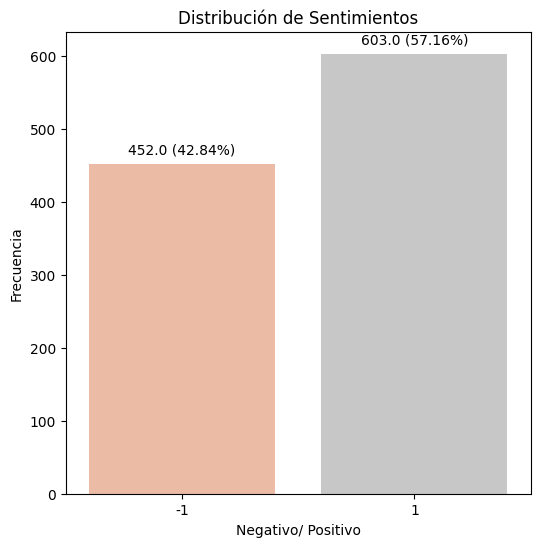

In [ ]:
# Distribución de las etiquetas de sentimientos

plt.figure(figsize=(6, 6))

# Crear el gráfico de barras con Seaborn
ax = sns.countplot(x='feeling', data=df, palette= 'RdGy' )

# Agregar título y etiquetas a los ejes
plt.title('Distribución de Sentimientos')
plt.xlabel('Negativo/ Positivo')
plt.ylabel('Frecuencia')

# Anotar cada barra con el conteo y la proporción
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / len(df) * 100:.2f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


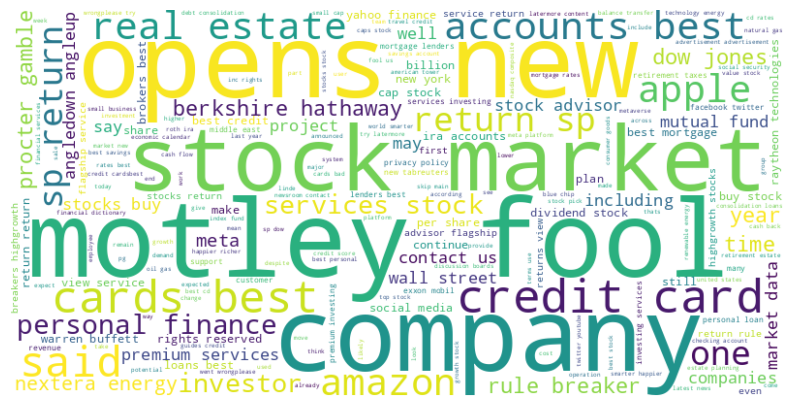

In [ ]:
# Descargar las stopwords de NLTK (esto solo necesita hacerse una vez)
import nltk
nltk.download('stopwords')

# Concatenar todas las noticias en un solo texto
text = ' '.join(df['text'])+' '.join(df['description'])+' '.join(df['title'])


# Tokenizar el texto en palabras
words = word_tokenize(text)

# Filtrar stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.lower() not in stop_words not in updated_stopwords_list  and word.isalpha()]

# Crear la nube de palabras
filtered_text = ' '.join(filtered_words)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(filtered_text)

# Mostrar la nube de palabras utilizando Matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

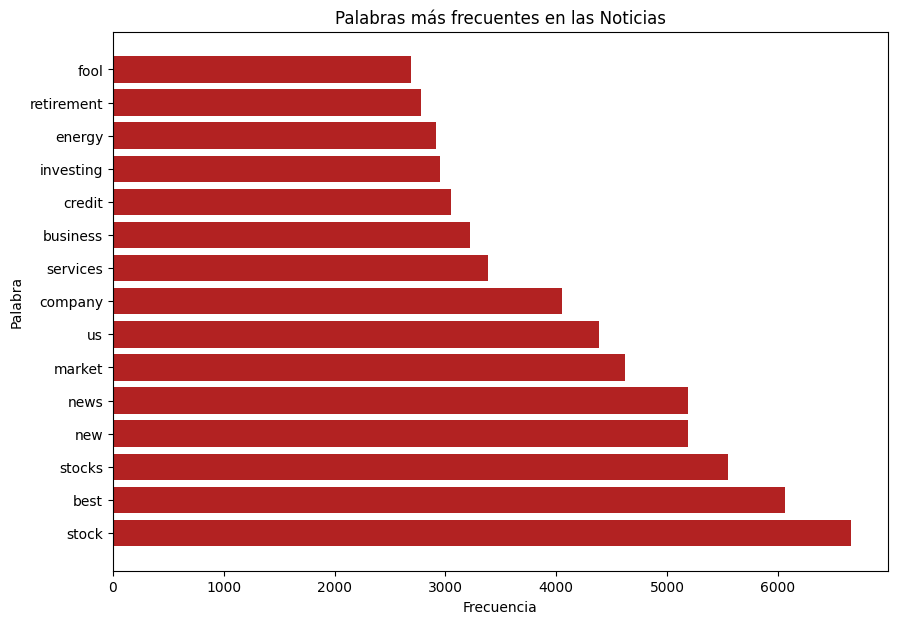

In [ ]:
# Concatenar todas las noticias en un solo texto
text = ' '.join(df['text'])+' '.join(df['description'])+' '.join(df['title'])


# Tokenizar el texto en palabras
words = word_tokenize(text)

# Filtrar stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.lower() not in stop_words not in updated_stopwords_list  and word.isalpha()]

# Crear un contador de palabras
word_counter = Counter(filtered_words)

# Obtener las 15 palabras más frecuentes
top_words = dict(word_counter.most_common(15))

# Crear el gráfico de barras vertical
plt.figure(figsize=(10, 7))
plt.barh(list(top_words.keys()), list(top_words.values()), color='firebrick')
plt.title('Palabras más frecuentes en las Noticias')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

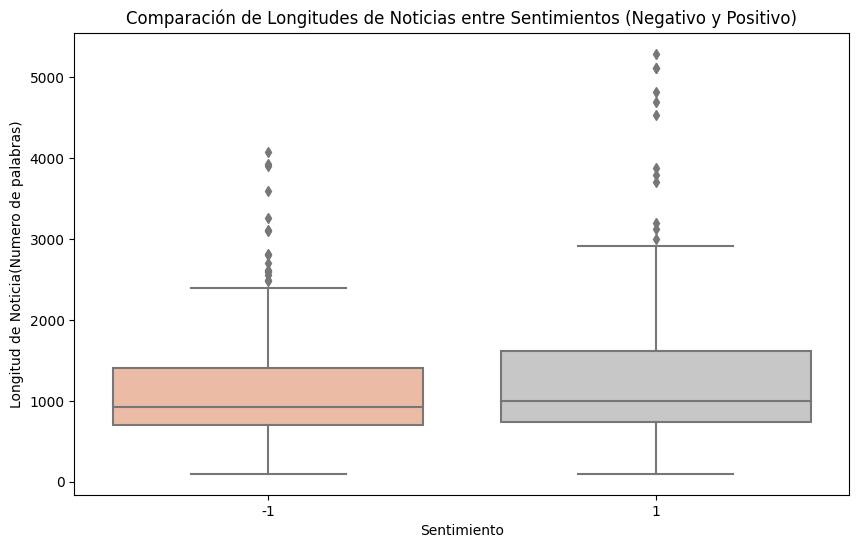

In [ ]:


# Crear un boxplot para comparar las longitudes entre sentimientos
plt.figure(figsize=(10, 6))
sns.boxplot(x='feeling', y='word_count', data=df, palette= 'RdGy')
plt.title('Comparación de Longitudes de Noticias entre Sentimientos (Negativo y Positivo)')
plt.xlabel('Sentimiento')
plt.ylabel('Longitud de Noticia(Numero de palabras)')
plt.show()

In [ ]:
correlacion = df['word_count'].corr(df['feeling'])
print(f"Correlación entre Longitud de Noticias y Sentimiento: {correlacion}")

Correlación entre Longitud de Noticias y Sentimiento: 0.08113459837230774


La correlacion entre Longitud de Noticias y Sentimiento es del 8% mostrando asi que no existe correlacion significativa.

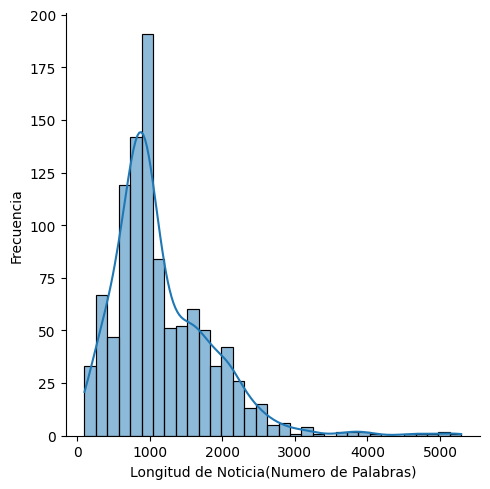

In [ ]:
ax= sns.displot(df["word_count"], kde=True)
ax.set(xlabel='Longitud de Noticia(Numero de Palabras)', ylabel='Frecuencia')
plt.show()

Hipótesis nula (H0): la longitud de las noticias siguen una distribución normal

Hipótesis nula (H1): la longitud de las noticias NO siguen una distribución normal

In [ ]:
from scipy.stats import shapiro

print(shapiro(df["word_count"]))

print("El valor de P es menor que 0.05 teniendo asi suficiente evidencia para rechazar la hipoteis nula.")
print("La longitud de las noticias no siguen una distribucion normal.")



ShapiroResult(statistic=0.8785452246665955, pvalue=6.528408510441994e-28)
El valor de P es menor que 0.05 teniendo asi suficiente evidencia para rechazar la hipoteis nula.
La longitud de las noticias no siguen una distribucion normal.


In [ ]:
df["word_count"].skew()

1.719602475654095

Basandonos en el anterior resultado se muestra que la tabla presenta una asimetria positiva(A la derecha)

**Valores Atipicos**

Se sigue la regla de que un valor es atipico (*Outlier*) si este esta a una distancia de mas de tres desviaciones estandar de su promedio.

In [ ]:
mean= df['word_count'].mean()
standard_deviation= df['word_count'].std()

print(f"Las noticias mayores a {mean+3*standard_deviation} palabras o menores a {mean-3*standard_deviation} ")
print("palabras son valores atipicos (Outliers)")

Las noticias mayores a 3241.5138066181953 palabras o menores a -915.8303942959208 
palabras son valores atipicos (Outliers)


###Analisis Noticias Positivas

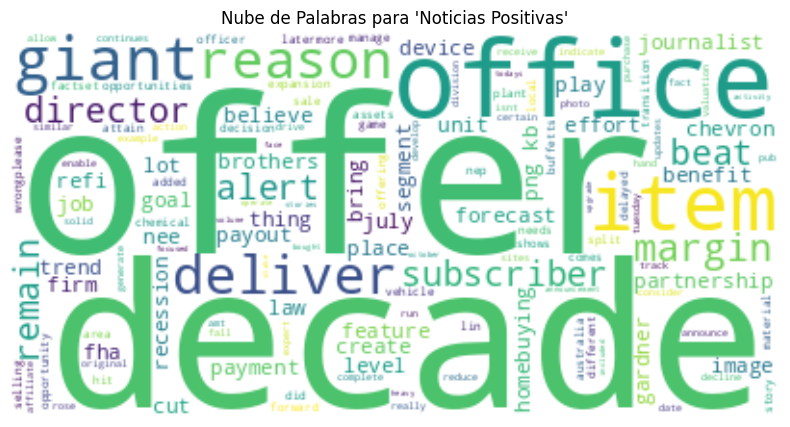

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Filtrar los textos en tus datos de entrenamiento para cada etiqueta
textos_positiva = X_train_raw[y_train == 1]['description']+X_train_raw[y_train == 1]['text']+X_train_raw[y_train == 1]['title']
textos_negativa = X_train_raw[y_train == -1]['description']+ X_train_raw[y_train == -1]['text']+X_train_raw[y_train == -1]['title']

# Unir todos los textos para cada etiqueta
texto_unido_positiva = " ".join(texto for texto in textos_positiva)
texto_unido_negativa = " ".join(texto for texto in textos_negativa)

# Crear y visualizar la nube de palabras para 'venta'
wordcloud_venta = WordCloud(stopwords=updated_stopwords_list, background_color="white").generate(texto_unido_positiva)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_venta, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras para 'Noticias Positivas'")
plt.show()



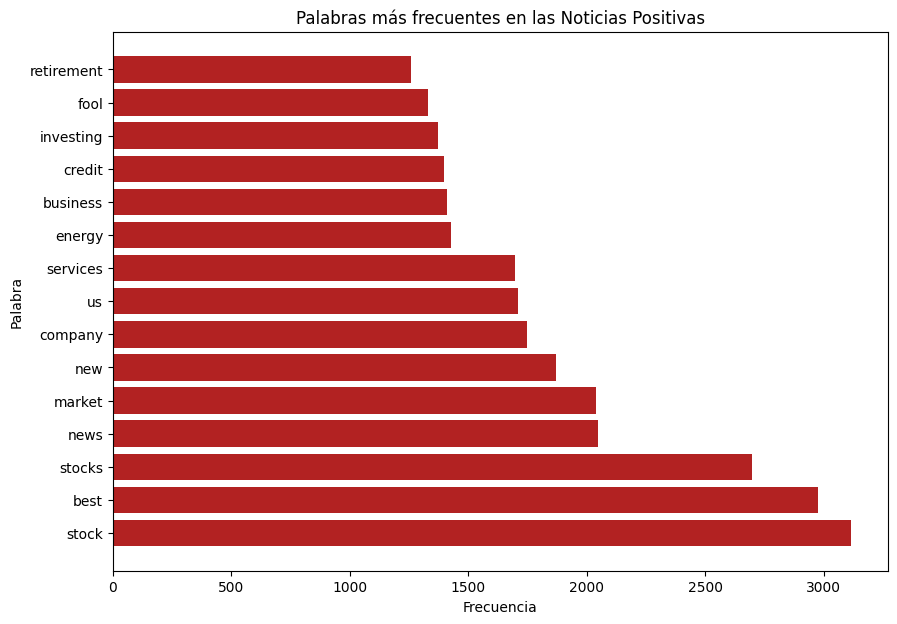

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



# Filtrar los textos en tus datos de entrenamiento para la etiqueta positiva
textos_positiva = X_train_raw[y_train == 1]['description']+X_train_raw[y_train == 1]['text']+X_train_raw[y_train == 1]['title']

# Unir todos los textos positivos
texto_unido_positiva = " ".join(texto for texto in textos_positiva)

# Tokenizar el texto en palabras
words_positivos = word_tokenize(texto_unido_positiva)

# Filtrar stopwords
stop_words = set(stopwords.words('english'))
filtered_words_positivos = [word.lower() for word in words_positivos if word.lower() not in stop_words not in updated_stopwords_list  and word.isalpha()]

# Crear un contador de palabras
word_counter_positivos = Counter(filtered_words_positivos)

# Obtener las 15 palabras más frecuentes
top_words_positivos = dict(word_counter_positivos.most_common(15))

# Crear el gráfico de barras vertical
plt.figure(figsize=(10, 7))
plt.barh(list(top_words_positivos.keys()), list(top_words_positivos.values()), color='firebrick')
plt.title('Palabras más frecuentes en las Noticias Positivas')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()




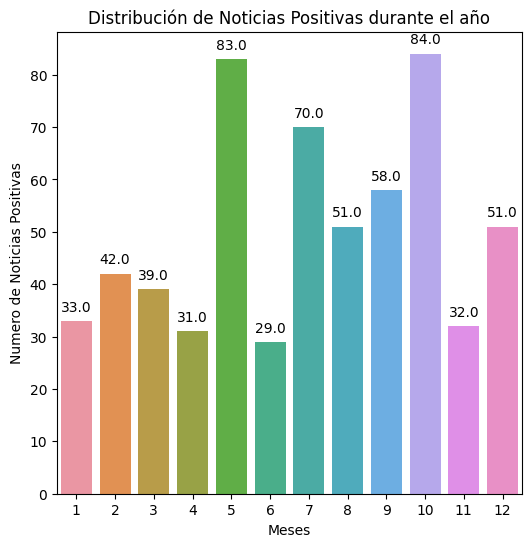

In [ ]:
#Crear un dataframe de solo las noticias negativas
data_positiva= df[df['feeling']>0]


#Concatenar las columnas meses y feeling positivo
df_positivo= pd.concat([data_positiva['Month'],data_positiva['feeling']], axis=1)




# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='Month', data=df_positivo )

# Agregar título y etiquetas a los ejes
plt.title('Distribución de Noticias Positivas durante el año')
plt.xlabel('Meses')
plt.ylabel('Numero de Noticias Positivas')

# Anotar cada barra con el conteo y la proporción
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

###Analisis Noticias Negativas

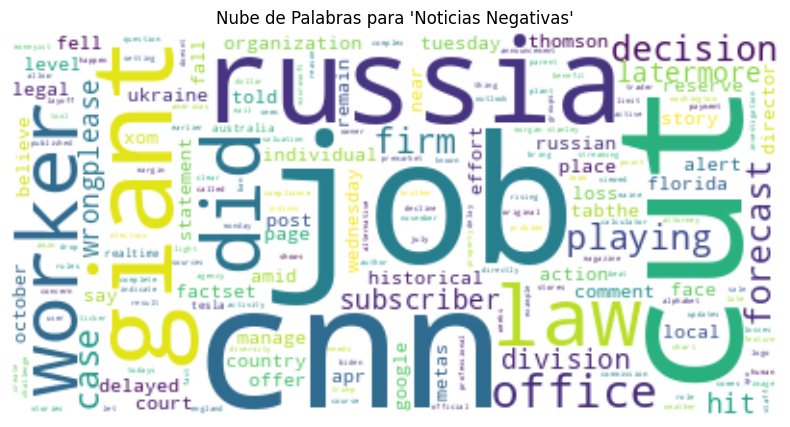

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Filtrar los textos en tus datos de entrenamiento para cada etiqueta
textos_positiva = X_train_raw[y_train == 1]['description']+X_train_raw[y_train == 1]['text']+X_train_raw[y_train == 1]['title']
textos_negativa = X_train_raw[y_train == -1]['description']+ X_train_raw[y_train == -1]['text']+X_train_raw[y_train == -1]['title']

# Unir todos los textos para cada etiqueta
texto_unido_positiva = " ".join(texto for texto in textos_positiva)
texto_unido_negativa = " ".join(texto for texto in textos_negativa)

# Crear y visualizar la nube de palabras para 'venta'
wordcloud_venta = WordCloud(stopwords=updated_stopwords_list, background_color="white").generate(texto_unido_negativa)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_venta, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras para 'Noticias Negativas'")
plt.show()


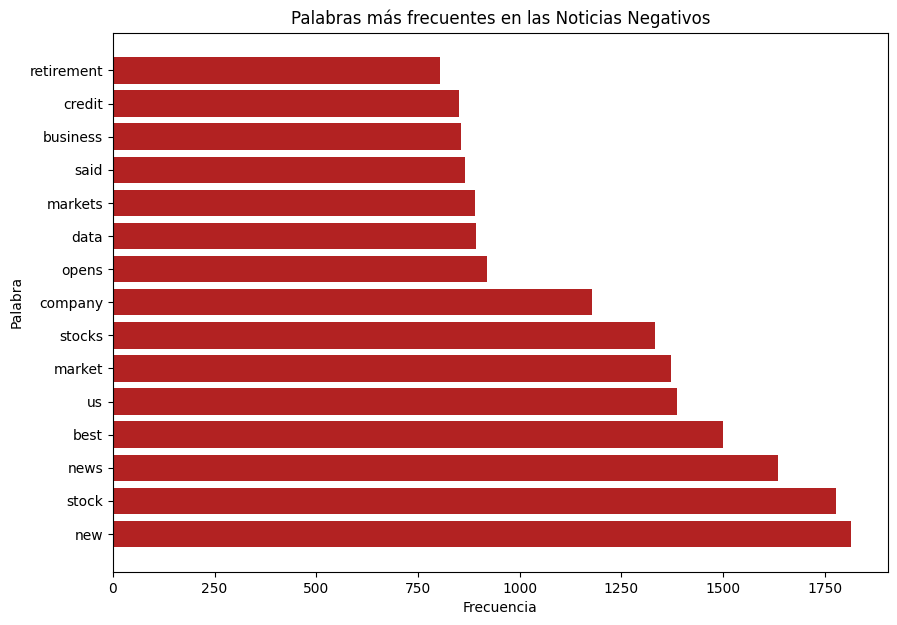

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Filtrar los textos en tus datos de entrenamiento para cada etiqueta
textos_negativa = X_train_raw[y_train == -1]['description']+ X_train_raw[y_train == -1]['text']+X_train_raw[y_train == -1]['title']

# Unir todos los textos para cada etiqueta
texto_unido_negativa = " ".join(texto for texto in textos_negativa)

# Tokenizar el texto en palabras
words_negativos = word_tokenize(texto_unido_negativa)

# Filtrar stopwords
stop_words = set(stopwords.words('english'))
filtered_words_negativos = [word.lower() for word in words_negativos if word.lower() not in stop_words not in updated_stopwords_list  and word.isalpha()]

# Crear un contador de palabras
word_counter_negativos = Counter(filtered_words_negativos)

# Obtener las 15 palabras más frecuentes
top_words_negativos = dict(word_counter_negativos.most_common(15))

# Crear el gráfico de barras vertical
plt.figure(figsize=(10, 7))
plt.barh(list(top_words_negativos.keys()), list(top_words_negativos.values()), color='firebrick')
plt.title('Palabras más frecuentes en las Noticias Negativos')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

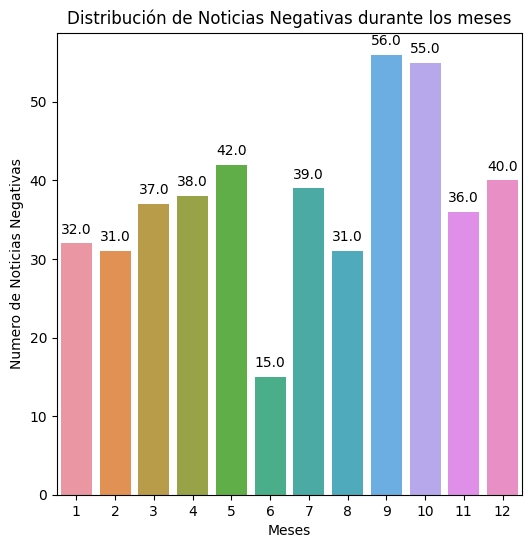

In [ ]:
#Crear un dataframe de solo las noticias negativas
data_negativa= df[df['feeling']<0]


#Concatenar las columnas meses y feeling positivo
df_negativo= pd.concat([data_negativa['Month'],data_negativa['feeling']], axis=1)





# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='Month', data=df_negativo)

# Agregar título y etiquetas a los ejes
plt.title('Distribución de Noticias Negativas durante los meses')
plt.xlabel('Meses')
plt.ylabel('Numero de Noticias Negativas')

# Anotar cada barra con el conteo y la proporción
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()

## Modelos

### Modelo KNN

K vecinos se centra en predecir la etiqueta de la noticia con base en sí las noticias cercanas (Sus Vecinos) en el plano son positivas o negativas. Fundamentado en que las características de la noticia harán que esta sea posicionada cercana a las otras noticias de su misma clase. El modelo se comenzó entrenando con sus 7 vecinos más cercanos para después de la hipercaracterización descubrir que el número más óptimo es de 39, con el cual es entrenado el modelo final. Este modelo busca a sus vecinos mas cercanos usando la ecuacion de distancia euclidiana presentada a continuacion

<center>
<p style="text-align:center;"><img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/3c/fb/EuclideanDistance.component.complex-narrative-xl.ts=1698405523662.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/complex_narrative0/items/content_group_610921119/image" width = "400" height = "200" border="0"/ alt="Logo"></p></center>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=39)

# Entrenar el modelo KNN con los datos de entrenamiento
knn_model.fit(X_train_tfidf, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba
y_pred = knn_model.predict(X_test_tfidf)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Configurar los parámetros que quieres buscar
param_grid = {
    'n_neighbors': [1,5,10,15,30,60]
}

# Crear el modelo KNN que vas a usar
knn = KNeighborsClassifier()

# Crear el GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajustar el GridSearchCV a tus datos de entrenamiento
grid_search.fit(X_train_tfidf, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Mejor score encontrado
print("Mejor score de validación cruzada (accuracy):", grid_search.best_score_)




Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores parámetros: {'n_neighbors': 30}
Mejor score de validación cruzada (accuracy): 0.6884261812833242


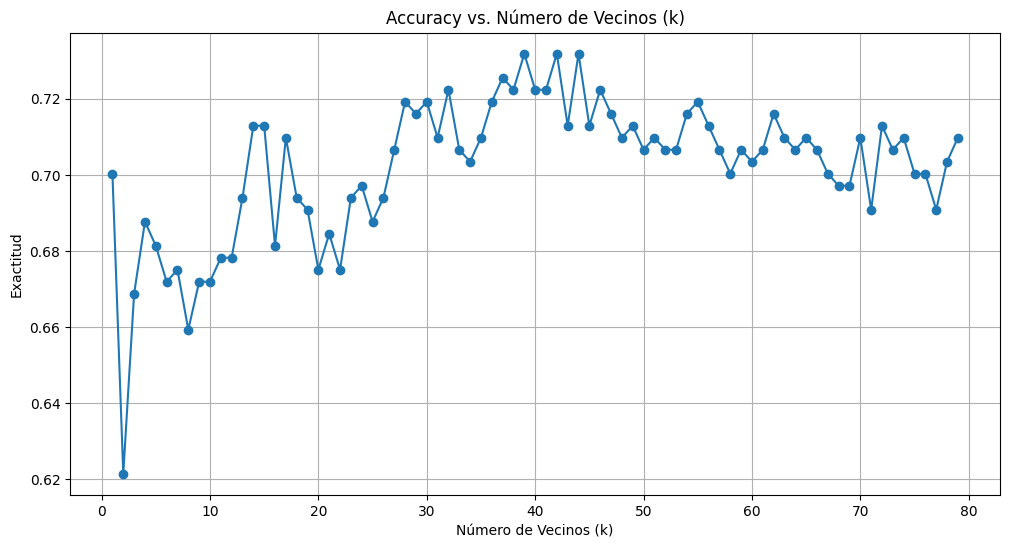

In [ ]:
# Definir un rango de valores para "k"
k_values = list(range(1, 80))

# Listas para guardar las exactitudes para cada valor de "k"
accuracies = []

# Para cada valor de "k", entrenar un modelo KNN y evaluar su exactitud
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_tfidf, y_train)
    y_pred = knn.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la exactitud en función de "k"
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("Accuracy vs. Número de Vecinos (k)")
plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Exactitud")
plt.grid(True)
plt.show()

### Modelo Arbol de Decision

Su proceso de prediccion se basa de varias etapas secuenciales donde se hacen pruebas de sus caracteristicas de tipo binario(Si y no) de esa manera descartando. El parametro random state es establecido en 42 para de esa manera mantener resultados constantes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)  # Puedes ajustar otros parámetros según sea necesario

# Entrenar el modelo de Árbol de Decisión con los datos de entrenamiento
dt_model.fit(X_train_tfidf, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba con el modelo de Árbol de Decisión
y_pred_dt = dt_model.predict(X_test_tfidf)

### Modelo Random Forest

Como el nombre indica, es un conjunto de árboles de decisiones donde cada uno es entrenando con un subconjunto de datos y características. La predicción final es establecida por votación de cada uno de los resultados. El parámetro inicial es establecido en 100 árboles para después en la hiperparametrizacion establecer 200 árboles y una profundidad de 15 como la mejor combinación de parámetros brindando así el entrenamiento final del modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=0, max_depth=15)  # Puedes ajustar los parámetros según sea necesario

# Entrenar el modelo Random Forest con los datos de entrenamiento
rf_model.fit(X_train_tfidf, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba
y_pred_rf = rf_model.predict(X_test_tfidf)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el espacio de parámetros para la búsqueda de cuadrícula
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Número de árboles
    'max_depth': [5, 15]  # Profundidad máxima de los árboles
}

# Crear el modelo Random Forest
rf = RandomForestClassifier(random_state=0)

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustar el GridSearchCV a tus datos de entrenamiento
grid_search.fit(X_train_tfidf, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Mejor score encontrado
print("Mejor score de validación cruzada (accuracy):", grid_search.best_score_)

# También puedes recuperar el mejor modelo directamente
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Mejores parámetros: {'max_depth': 15, 'n_estimators': 200}
Mejor score de validación cruzada (accuracy): 0.6978319783197833


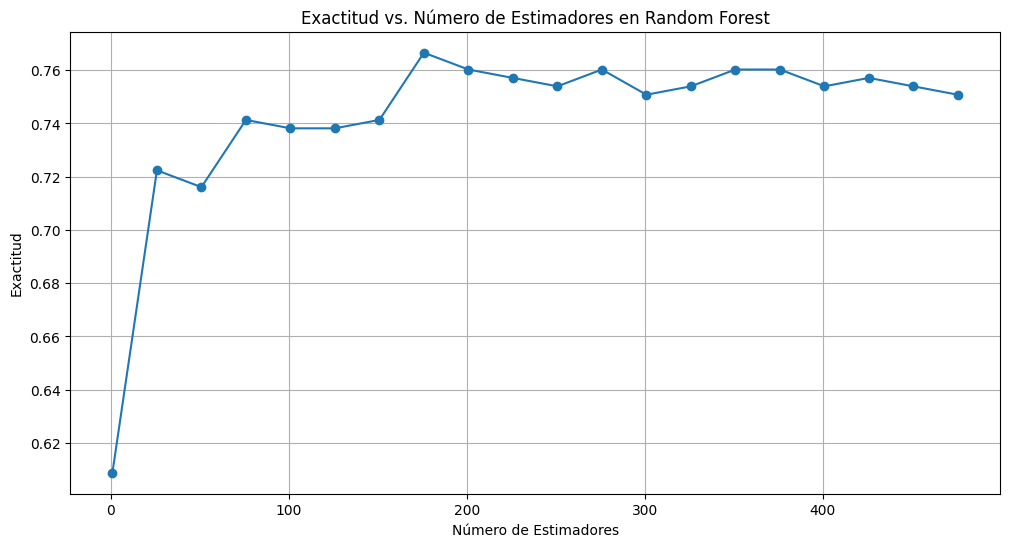

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Definir un rango de valores para el número de árboles en el bosque
n_estimators_values = list(range(1, 501,25))

# Lista para guardar las exactitudes para cada número de árboles
forest_accuracies = []

# Para cada valor de n_estimators, entrenar un modelo Random Forest y evaluar su exactitud
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=0)
    rf.fit(X_train_tfidf, y_train)
    y_pred_rf = rf.predict(X_test_tfidf)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    forest_accuracies.append(accuracy_rf)

# Graficar la exactitud en función del número de árboles
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_values, forest_accuracies, marker='o', linestyle='-')
plt.title("Exactitud vs. Número de Estimadores en Random Forest")
plt.xlabel("Número de Estimadores")
plt.ylabel("Exactitud")
plt.grid(True)
plt.show()


### Modelo SVM

El modelo SVM es entrenado para encontrar un hiperplano que logre con éxito separar las clases en diferentes espacios de características. Con el objetivo principal de mantener un margen entre las clases donde puedan entrar nuevas. Se empezó con un valor de C=10 y sin ningún kernel específico. La hiperparametrizacion dio resultado a un C=1 y un Kernel rbf siendo estos los parámetros para el entrenamiento del modelo final.

In [ ]:
from sklearn.svm import SVC

# Modelo SVM
svm_model = SVC(random_state=0, C=1, kernel='rbf')  # Puedes ajustar otros parámetros como 'kernel', 'C', etc.

# Entrenar el modelo SVM con los datos de entrenamiento
svm_model.fit(X_train_tfidf, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba con el modelo SVM
y_pred_svm = svm_model.predict(X_test_tfidf)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

# Configurar los parámetros que quieres buscar
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

# Crear el modelo KNN que vas a usar
svc = svm.SVC()

# Crear el GridSearchCV
grid_search = GridSearchCV(svc, parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajustar el GridSearchCV a tus datos de entrenamiento
grid_search.fit(X_train_tfidf, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Mejor score encontrado
print("Mejor score de validación cruzada (accuracy):", grid_search.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores parámetros: {'C': 10, 'kernel': 'rbf'}
Mejor score de validación cruzada (accuracy): 0.7534013605442176


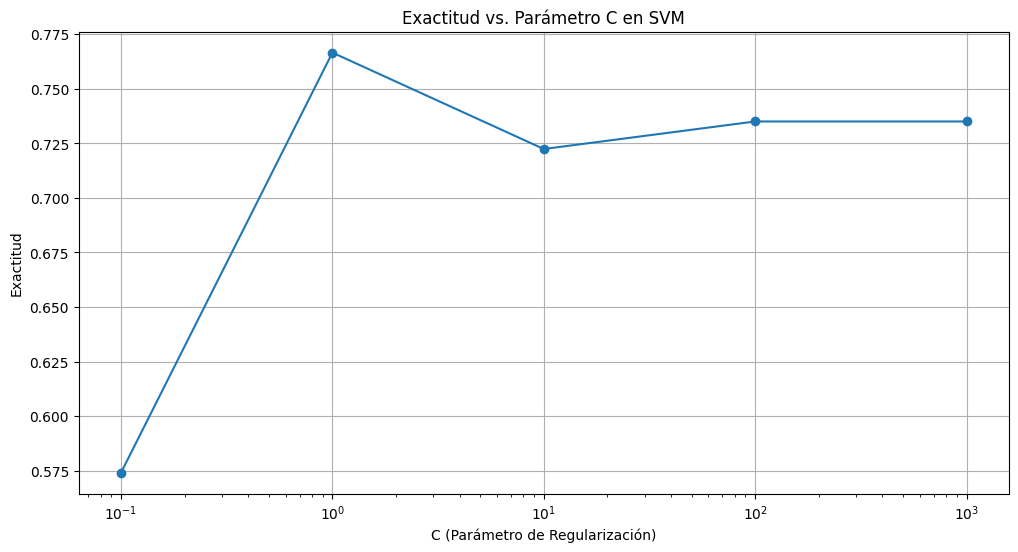

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Definir un rango de valores para el parámetro C
C_values = [0.1, 1, 10, 100, 1000]

# Lista para guardar las exactitudes para cada valor de C
svm_accuracies = []

# Para cada valor de C, entrenar un modelo SVM y evaluar su exactitud
for C in C_values:
    svm = SVC(C=C, random_state=0)
    svm.fit(X_train_tfidf, y_train)
    y_pred_svm = svm.predict(X_test_tfidf)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    svm_accuracies.append(accuracy_svm)

# Graficar la exactitud en función del parámetro C
plt.figure(figsize=(12, 6))
plt.plot(C_values, svm_accuracies, marker='o', linestyle='-')
plt.title("Exactitud vs. Parámetro C en SVM")
plt.xlabel("C (Parámetro de Regularización)")
plt.ylabel("Exactitud")
plt.xscale('log')  # Escala logarítmica si los valores de C varían mucho
plt.grid(True)
plt.show()

## Resultados

### Modelo KNN

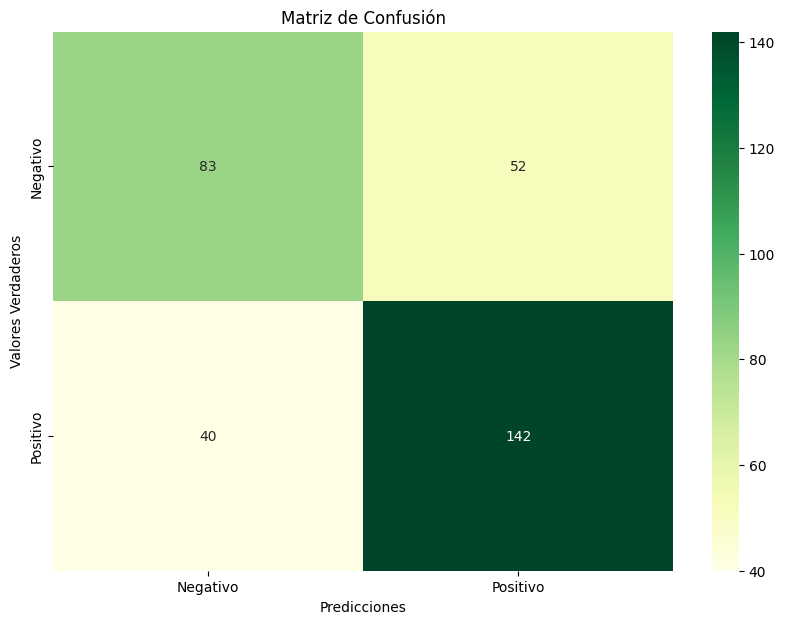

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Siendo y_test  tus etiquetas verdaderas y y_pred las predicciones de tu modelo
matriz_confusion = confusion_matrix(y_test, y_pred)

# Etiquetas para la matriz de confusión, ajusta estas según tus etiquetas de clase
etiquetas = ['Negativo', 'Positivo']

# Crear el heatmap con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='YlGn', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7097791798107256
              precision    recall  f1-score   support

          -1       0.67      0.61      0.64       135
           1       0.73      0.78      0.76       182

    accuracy                           0.71       317
   macro avg       0.70      0.70      0.70       317
weighted avg       0.71      0.71      0.71       317



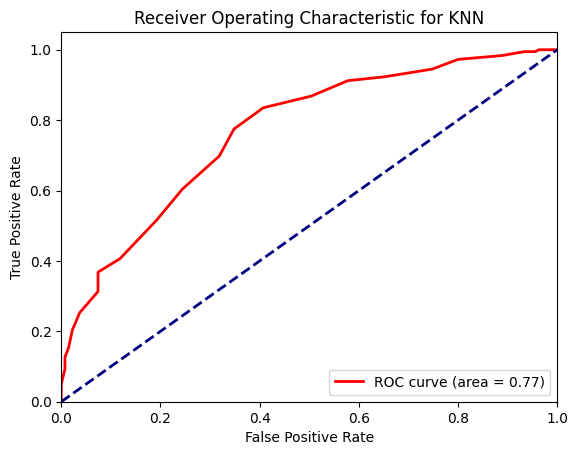

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Asegúrate de haber entrenado tu modelo KNN como se muestra en tu código

# Predecir las probabilidades para el conjunto de datos de prueba con el modelo KNN
y_pred_prob_knn = knn_model.predict_proba(X_test_tfidf)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)

# Calcular el Área Bajo la Curva (AUC) para el modelo KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Graficar la curva ROC para el modelo KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()

### Modelo Arbol de Decision

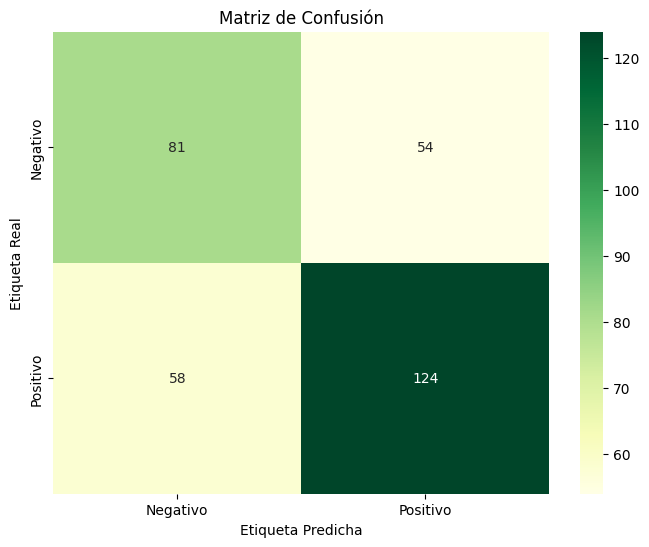

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Opcional para una visualización más bonita

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_dt)

# Etiquetas para la matriz de confusión, ajusta estas según tus etiquetas de clase
etiquetas = ['Negativo', 'Positivo']

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn',xticklabels=etiquetas, yticklabels=etiquetas)  # Usando seaborn para una visualización más bonita
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.6466876971608833
              precision    recall  f1-score   support

          -1       0.58      0.60      0.59       135
           1       0.70      0.68      0.69       182

    accuracy                           0.65       317
   macro avg       0.64      0.64      0.64       317
weighted avg       0.65      0.65      0.65       317



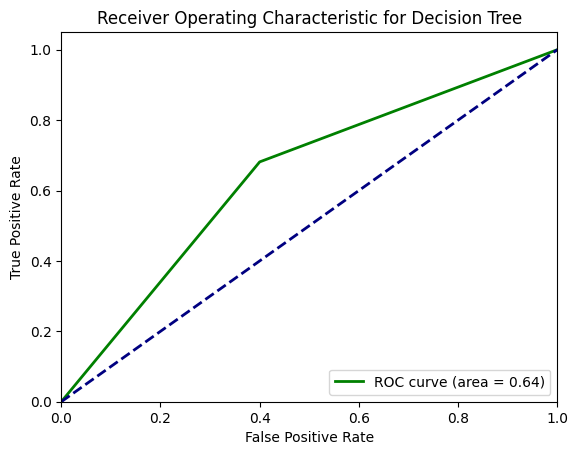

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predecir las probabilidades para el conjunto de datos de prueba con el modelo de Árbol de Decisión
# Asegúrate de que estás usando el modelo correcto (en este caso, dt_model)
y_pred_prob_dt = dt_model.predict_proba(X_test_tfidf)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)

# Calcular el Área Bajo la Curva (AUC) para el modelo de Árbol de Decisión
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Graficar la curva ROC para el modelo de Árbol de Decisión
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()

### Modelo Random Forest

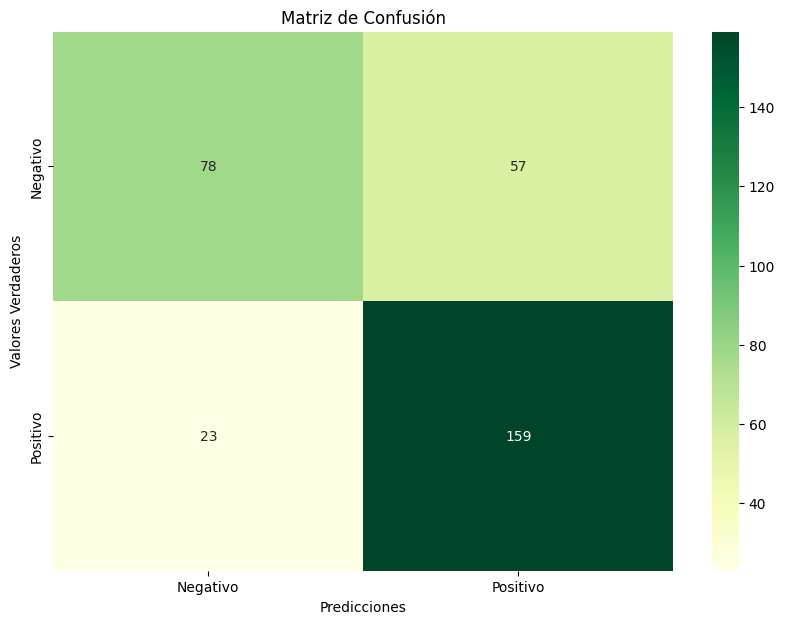

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que y_test son tus etiquetas verdaderas y y_pred las predicciones de tu modelo
matriz_confusion = confusion_matrix(y_test, y_pred_rf)

# Etiquetas para la matriz de confusión, ajusta estas según tus etiquetas de clase
etiquetas = ['Negativo', 'Positivo']

# Crear el heatmap con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='YlGn', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.7476340694006309
              precision    recall  f1-score   support

          -1       0.77      0.58      0.66       135
           1       0.74      0.87      0.80       182

    accuracy                           0.75       317
   macro avg       0.75      0.73      0.73       317
weighted avg       0.75      0.75      0.74       317



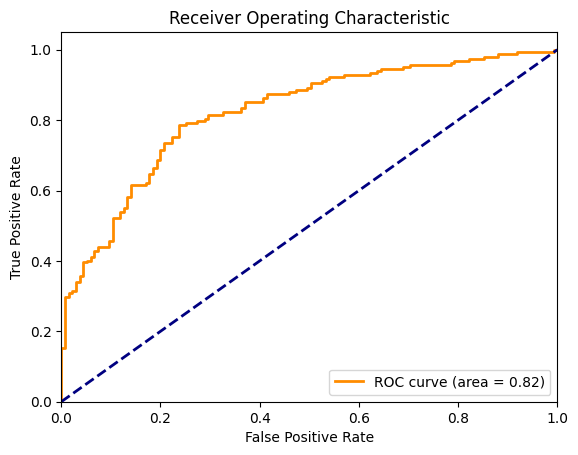

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predecir las probabilidades para el conjunto de datos de prueba
# Asegúrate de que estás usando el modelo correcto (en este caso, rf_model)
y_pred_prob_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Calcular el Área Bajo la Curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Modelo SVM

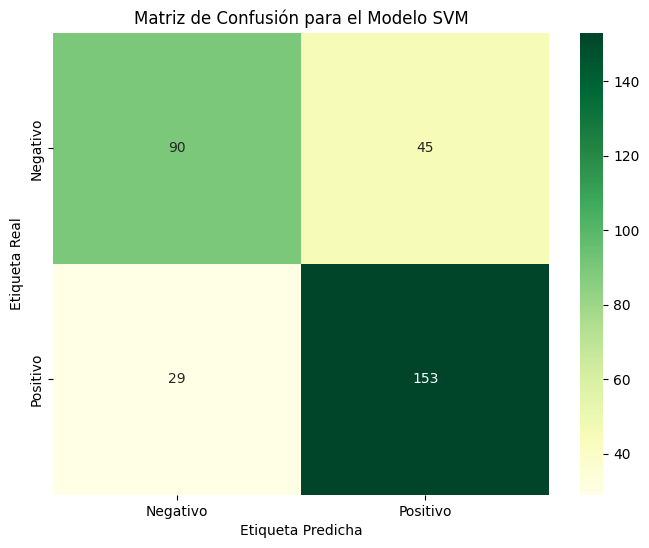

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión para el modelo SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Etiquetas para la matriz de confusión
etiquetas = ['Negativo', 'Positivo']

# Graficar la matriz de confusión con etiquetas personalizadas
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='YlGn', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusión para el Modelo SVM')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.7665615141955836
              precision    recall  f1-score   support

          -1       0.76      0.67      0.71       135
           1       0.77      0.84      0.81       182

    accuracy                           0.77       317
   macro avg       0.76      0.75      0.76       317
weighted avg       0.77      0.77      0.76       317



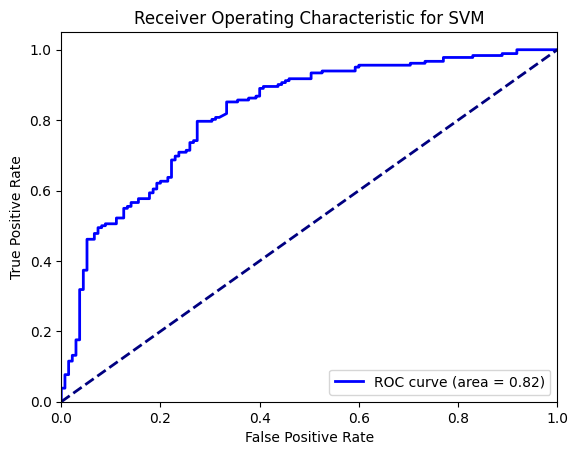

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Modelo SVM con probabilidades habilitadas
svm_model = SVC(random_state=0, probability=True)  # Habilitar probabilidades

# Entrenar el modelo SVM con los datos de entrenamiento
svm_model.fit(X_train_tfidf, y_train)

# Predecir las probabilidades para el conjunto de datos de prueba con el modelo SVM
y_pred_prob_svm = svm_model.predict_proba(X_test_tfidf)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)

# Calcular el Área Bajo la Curva (AUC) para el modelo SVM
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Graficar la curva ROC para el modelo SVM
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='blue',  lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()

### General

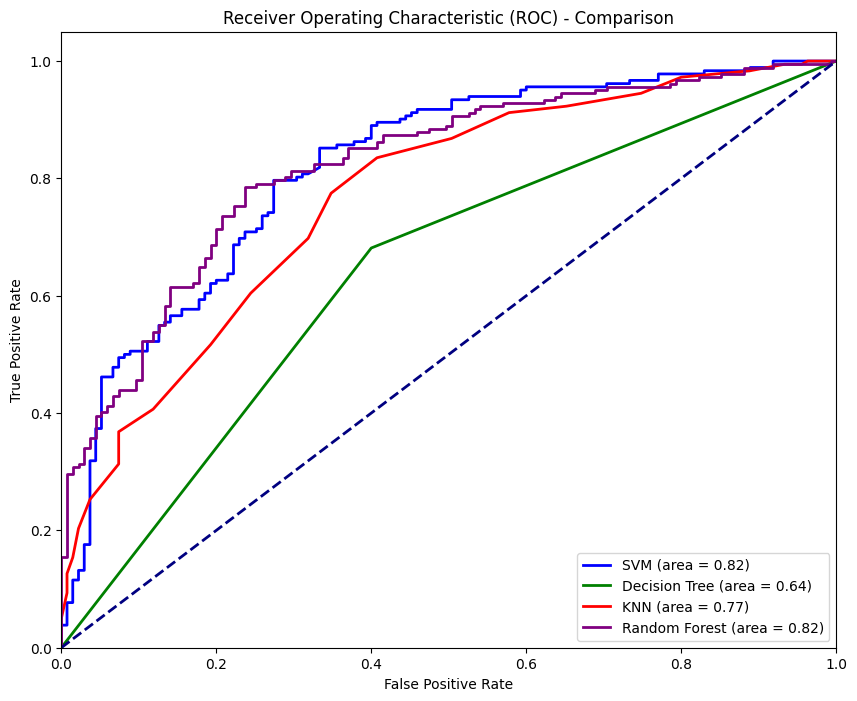

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Asegúrate de haber calculado previamente y_pred_prob_svm, y_pred_prob_dt, y_pred_prob_knn, y_pred_prob_rf
# para los modelos SVM, Árbol de Decisión, KNN y Random Forest respectivamente

# Calcular curva ROC y AUC para cada modelo
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar todas las curvas ROC en la misma figura
plt.figure(figsize=(10, 8))

plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm, color='blue', lw=2)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.2f)' % roc_auc_dt, color='green', lw=2)
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.2f)' % roc_auc_knn, color='red', lw=2)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf, color='purple', lw=2)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Comparison')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Resumen General de los Modelos")
resumen = {'Modelo': ['KNN','Random Forest','Arbol de Decision','SVM'], 'Precision': [0.73,0.74,0.70,0.77], 'Recall': [0.78,0.87,0.68,0.84], 'Acurracy': [0.71, 0.75,0.65,0.77], 'F1-Score': [0.76,0.80,0.69,0.81]}
df_resumen = pd.DataFrame(data=resumen)
df_resumen.head(5)

Resumen General de los Modelos


,Modelo,Precision,Recall,Acurracy,F1-Score
0,KNN,0.73,0.78,0.71,0.76
1,Random Forest,0.74,0.87,0.75,0.80
2,Arbol de Decision,0.70,0.68,0.65,0.69
3,SVM,0.77,0.84,0.77,0.81


## Discusion

Con los miles de noticias que se crean al día es beneficioso para Bancolombia poder clasificar automáticamente las noticias positivas o negativas, para de esa manera poder prestar atención a aquellas que son de suma importancia para la toma de decisiones de la empresa en sus diferentes ámbitos y así asegurar su correcto funcionamiento. Las variables que se tuvieron en cuenta fueron texto, descripción y título, esto después de ver cómo las variables de search y media no aportan al contexto de la noticia y de esa manera su tono.

**Analisis Exploratorio**

Durante el análisis exploratorio de los datos se pudo encontrar diferentes patrones importantes a mencionar. Primeramente, evidenciamos una distribución entre noticias positivas y negativas del 57.16% y un 42.84% respectivamente, haciendo que no sean completamente balanceados. Secundariamente, en promedio las noticias más largas eran las positivas como la gráfica de caja y bigotes muestra. No obstante, al hacer una prueba de correlación, esta terminó mostrando que la relación entre ambas variables es baja, de esa manera no habiendo correlación. En cuanto a la longitud de las noticias, se logró comprobar que estas no siguen una distribución normal, teniendo así una asimetría positiva y valores atípicos desde las, 3241 palabras. En la frecuencia de palabras se vio entre las más comunes palabras relacionadas con la economía y las finanzas, como mercados, stocks, y compañías, además la mención de la potencia económica a nivel mundial Estados Unidos bajo la palabra US. Centrándose ya en el tono de las noticias, los gráficos de barras demostraron que los meses con mayor número de noticias positivas son mayo y octubre, y los meses con mayor número de noticias negativas septiembre y octubre. Como último punto y el de mayor importancia, se logró ver que las palabras más comunes entre noticias positivas y negativas eran casi iguales, tales como stock, market, y Us. Llevando a concluir que aquellas palabras que definen el tono de las palabras no son las más comunes entre estas, sino palabras menos usadas, pero muy específicas al contexto que llevan a que esta tenga un tono positivo, como las palabras offer, giant, margin y benefit o negativo como job, law, cut o russia.

**Priorización de Metricas**

Para Bancolombia, la mayor preocupación deben ser las noticias negativas, puesto que estas tienen efectos inmediatos en el país y los mercados financieros, haciendo así que ellos tengan que responder con decisiones eficaces y rápidas a los cambios en el mercado. Es por eso que a Bancolombia le debe interesar un modelo donde la precisión sea alta, evitando así que noticias negativas sean clasificadas incorrectamente, convirtiéndolas en falsos positivos y por consiguiente que el banco no esté al tanto de estas noticias negativas. Como segunda prioridad, el banco debe tener la exactitud en cuenta, puesto que igualmente le interesa que estas noticias sean correctamente asignadas para ver si hay crecimiento de noticias positivas o negativas y así medir los ánimos de los mercados. Además, el f1 score sigue siendo de suma importancia, puesto que en el caso que las noticias que lleguen a las bases de datos en Bancolombia en algún momento sean balanceados, la medida f1 tendrá prioridad, puesto que a esta no le afecta que los datos sean balanceados algo que no sucede con la exactitud.Teniendo esto en cuenta, el modelo a buscar es aquel que tenga un alto porcentaje de precisión, pero que igualmente mantenga una medida de f1 y exactitud alta. Después de entrenar los modelos, sacar resultados preliminares para después de eso mejorar sus parámetros, se dieron las diferentes medidas de exactitud, precisión, recall, y f1 de los 4 diferentes modelos que se estudiaron.

**Escogencia de Modelo**

Los resultados indicaron que el modelo de clasificación más sencillo siendo este árbol de decisión fue el que peor rendimiento tuvo al tener una precisión de 0.70 y exactitud de 0.65. Siguiente a este, el modelo KNN presentó una exactitud de 0.71 y precisión de 0.73, quedando atrás de los dos modelos más óptimos. Random Forest presentó precisión de 0.74, exactitud de 0.75 y f1-score de 0.80. Por último, SVM dio una precisión de 0.77, una exactitud de 0.77 y un F1-score de 0.81. Con resultados muy parecidos y áreas iguales en las curvas ROC(Área de 0.82) se puede concluir que Random Forest Y SVM son modelos óptimos para la predicción de noticias positivas y negativas. Sin embargo, teniendo en cuenta el entorno práctico de Bancolombia al que sería implementado el modelo de clasificación, el modelo más óptimo sería la Máquina de Soporte Vectorial, debido a que su sectorización y capacidad de crear diferentes planos le da mucho poder a las bases de datos de Bancolombia. Puesto que así no se podría solo poder predecir si una noticia es positiva o negativa con buena exactitud y precisión, sino también Bancolombia podría crear modelos visuales donde se puedan ver que noticias están relacionadas con una noticia específica basándose en cierta característica y así crear relaciones entre estas llevando así a un mejor entendimiento de los mercados financieros, tasas de interés, desempleo entre otros eventos que le interesan a la empresa.

**Limitaciones**

Por último, es importante mencionar las limitaciones del modelo como el pequeño desbalance que había en las noticias, haciendo que no se pueda ver el potencial completo de estos modelos, además la posibilidad de poder haber llevado una parametrización más exhaustiva que incrementará las métricas estudiadas anteriormente y además los sesgos que las mismas noticias puedan tener afectando el modelo o la inminente amenaza de las noticias falsas que puedan mostrar una realidad no acertada en los modelos.


## Conclusiones

Entre los hallazgos claves del análisis exploratorio de datos se puede mencionar la falta de correlación entre la longitud de las noticias y su sentimiento, el pico de noticias positivas en mayo y octubre y de negativas en septiembre y octubre y como se demostró que las palabras más usadas no son las que definen el tono de la noticia sino palabras menos usadas, pero con mayor impacto a la hora de establecer el tono. Entre las conclusiones más generales de las investigaciones se pudo descubrir que el modelo de clasificación más adaptado a las necesidades de Bancolombia es el modelo de Máquina de soporte de vectores. Debido a que tuvo la mayor precisión y exactitud, además de tener la facilidad de con ciertas modificaciones poder ver relaciones entre diferentes noticias basadas en una característica específica. Es importante enfatizar como este modelo puede ayudar al grupo Bancolombia, puesto que las noticias tienen cada vez un mayor impacto en los ánimos de los inversores, consumidores y población general. Haciendo menester que Bancolombia tiene un modelo eficaz que pueda clasificar estas noticias midiendo así los ánimos generales de los mercados y además prestarle atención a aquellas noticias negativas y tomar decisiones para contrarrestarlas. Para concluir es importante brindar sugerencias a investigaciones futuras, siendo la principal área a mejorar la exploración de nuevas características como el estado de los mercados financieros para así ver el impacto de una noticia en cierta fecha al mercado financiero directamente. Además, explorar de qué manera estos modelos podrían filtrar aquellas noticias falsas o sesgadas con palabras claves, evitando así predicciones que no vayan acorde a la realidad. Punto que se podría lograr con máquinas de clasificaciones más avanzadas como aquellas que utilizan redes neuronales. No obstante, la implementación del modelo SVM en Bancolombia brindará un gran primer paso hacia la implementación de la inteligencia artificial en sus bases de datos. Así continuando su propósito de generar progreso económico en todas las áreas en las que opera.

## Recomendaciones

1. En primer lugar, a la empresa Bancolombia se le recomienda la implementación de un modelo de clasificación basado en Máquinas de Vectores de soporte. Para de esa manera poder tener un eficaz modelo que pueda clasificar las noticias positivas o negativas con alta precisión. Evitando así un gran número de falsos positivos donde noticias negativas sean clasificadas como positivas y no sean tenidas en cuenta. Además, se le recomienda dedicar parte de sus recursos a continuar la investigación de este ámbito siguiendo las sugerencias a investigaciones futuras mencionadas en las conclusiones. Dando la posibilidad a Bancolombia de crear un modelo poderoso de clasificación, optimizando el tiempo en el que la empresa se entera de una noticia relevante y toma acciones con base en esa noticia.

2. Como segunda recomendación, Bancolombia debería de entre todas las noticias darle gran importancia a aquellas relacionadas con la geopolítica internacional. Esto debido a la aparición de palabras como Rusia, US y ukraine en ambas noticias positivas y negativas como mostró la nube de palabras. Mostrando así el peso que los conflictos y geopolítica internacional tienen en el tono de las noticias y consecuentemente en los mercados internacionales y colombianos en los que participa Bancolombia.


3. Finalmente, basándose en los resultados de distribución de noticias positivas y negativas durante el año. Se le recomienda al grupo Bancolombia tener una actitud precavida en los meses de septiembre y octubre, donde son los meses donde más noticias negativas aparecen. Para de esa manera guiar sus inversiones y las de sus clientes de manera adecuada durante estos meses con mayor incertidumbre. Siguiendo esa idea de manera opuesta a Bancolombia le debe interesar explorar nuevas oportunidades más arriesgadas para ellos y sus clientes durante el mes de mayo, en cuál llegan mayor número de noticias positivas y por consiguiente mercados menos fluctuantes.

## Referencias

El poder de la palabra: La influencia de las noticias en los ánimos de los mercados financieros. (2019, December 16). IMF. https://www.imf.org/es/Blogs/Articles/2019/12/16/blog-the-power-of-text


Shung, K. P. (2020, April 10). Accuracy, precision, recall or F1? - towards data science. Medium. https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

